# Clique Analysis
Conducting a clique analysis of a network graph involves identifying and analyzing the cliques within the graph. A clique is a subset of nodes in a graph where every node is directly connected to every other node within the subset. 

In [1]:
from os.path import join
import os

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('./data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("./data/final_token_selection.csv")


/home/user/eisermann/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/user/eisermann/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
from src.analysis.clique_analysis_class import * 
from src.visualisations.clique_analysis_visualisations import * 

## Create dataframes for each metrics

In [3]:
# Initialize CliquesData
cliques_data_path = join(path, 'data/cliques_data_class.pkl')
cliques_data = CliquesData(cliques_data_path)

# Use the metric_names attribute from CliquesData
metric_names = cliques_data.metric_names

# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {
    'upper_bound': {'sample': {}, 'control': {}, 'pvalues': {}},
    'lower_bound': {'sample': {}, 'control': {}, 'pvalues': {}}
}

# Create DataFrames for each metric
for method in ['upper_bound', 'lower_bound']:
    for group in ['sample', 'control', 'pvalues']:
        for metric_name in metric_names:
            metric_dataframes[method][group][metric_name] = cliques_data.get_metric_data(method, group, metric_name)

## Figure Generation

### Fig: Size of Clique 

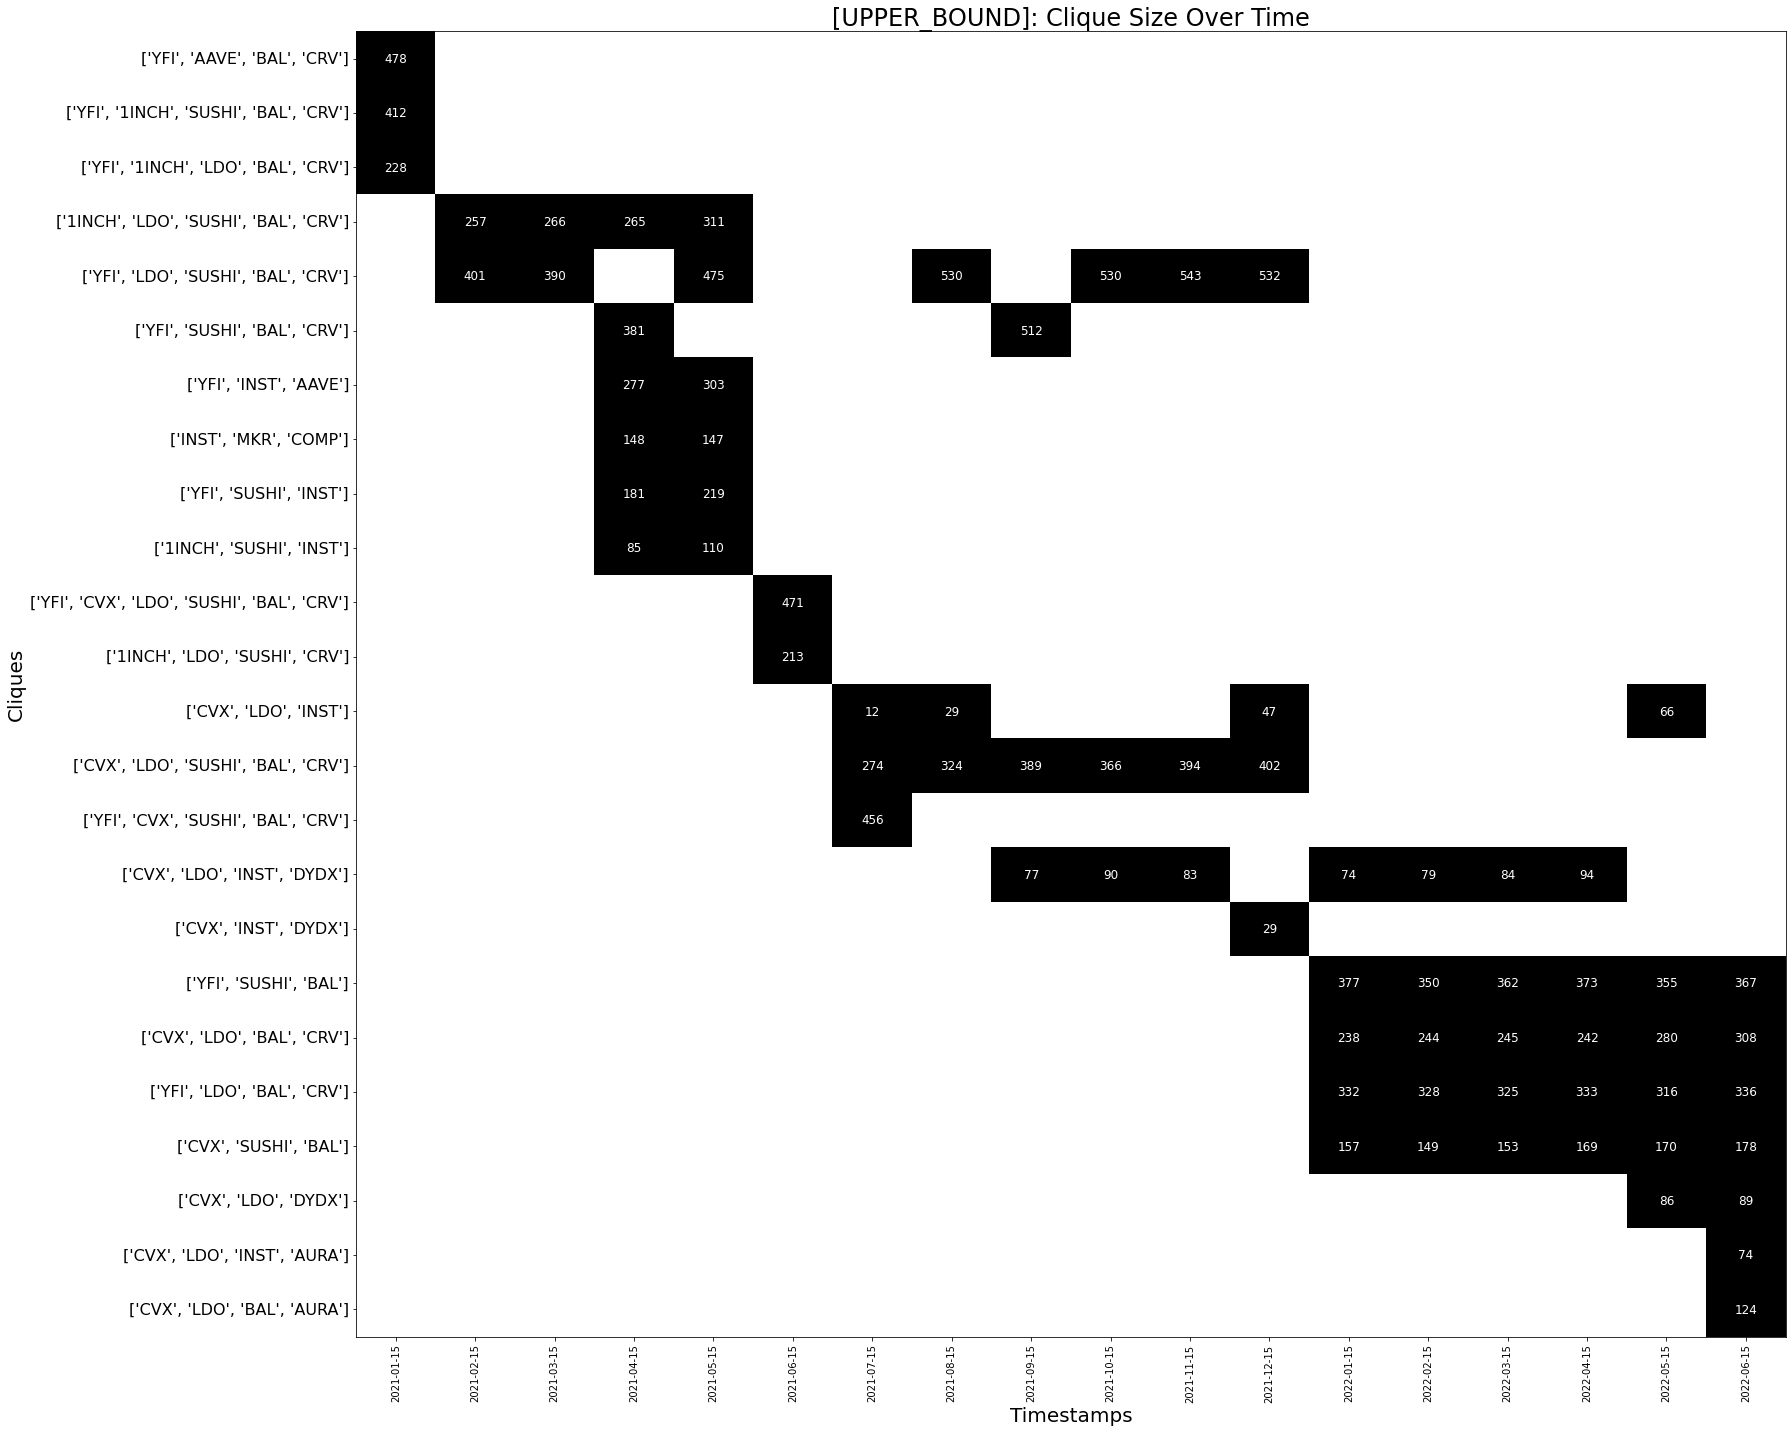

In [4]:
## show upper_bound
plot_clique_size_over_time(metric_dataframes, method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True)

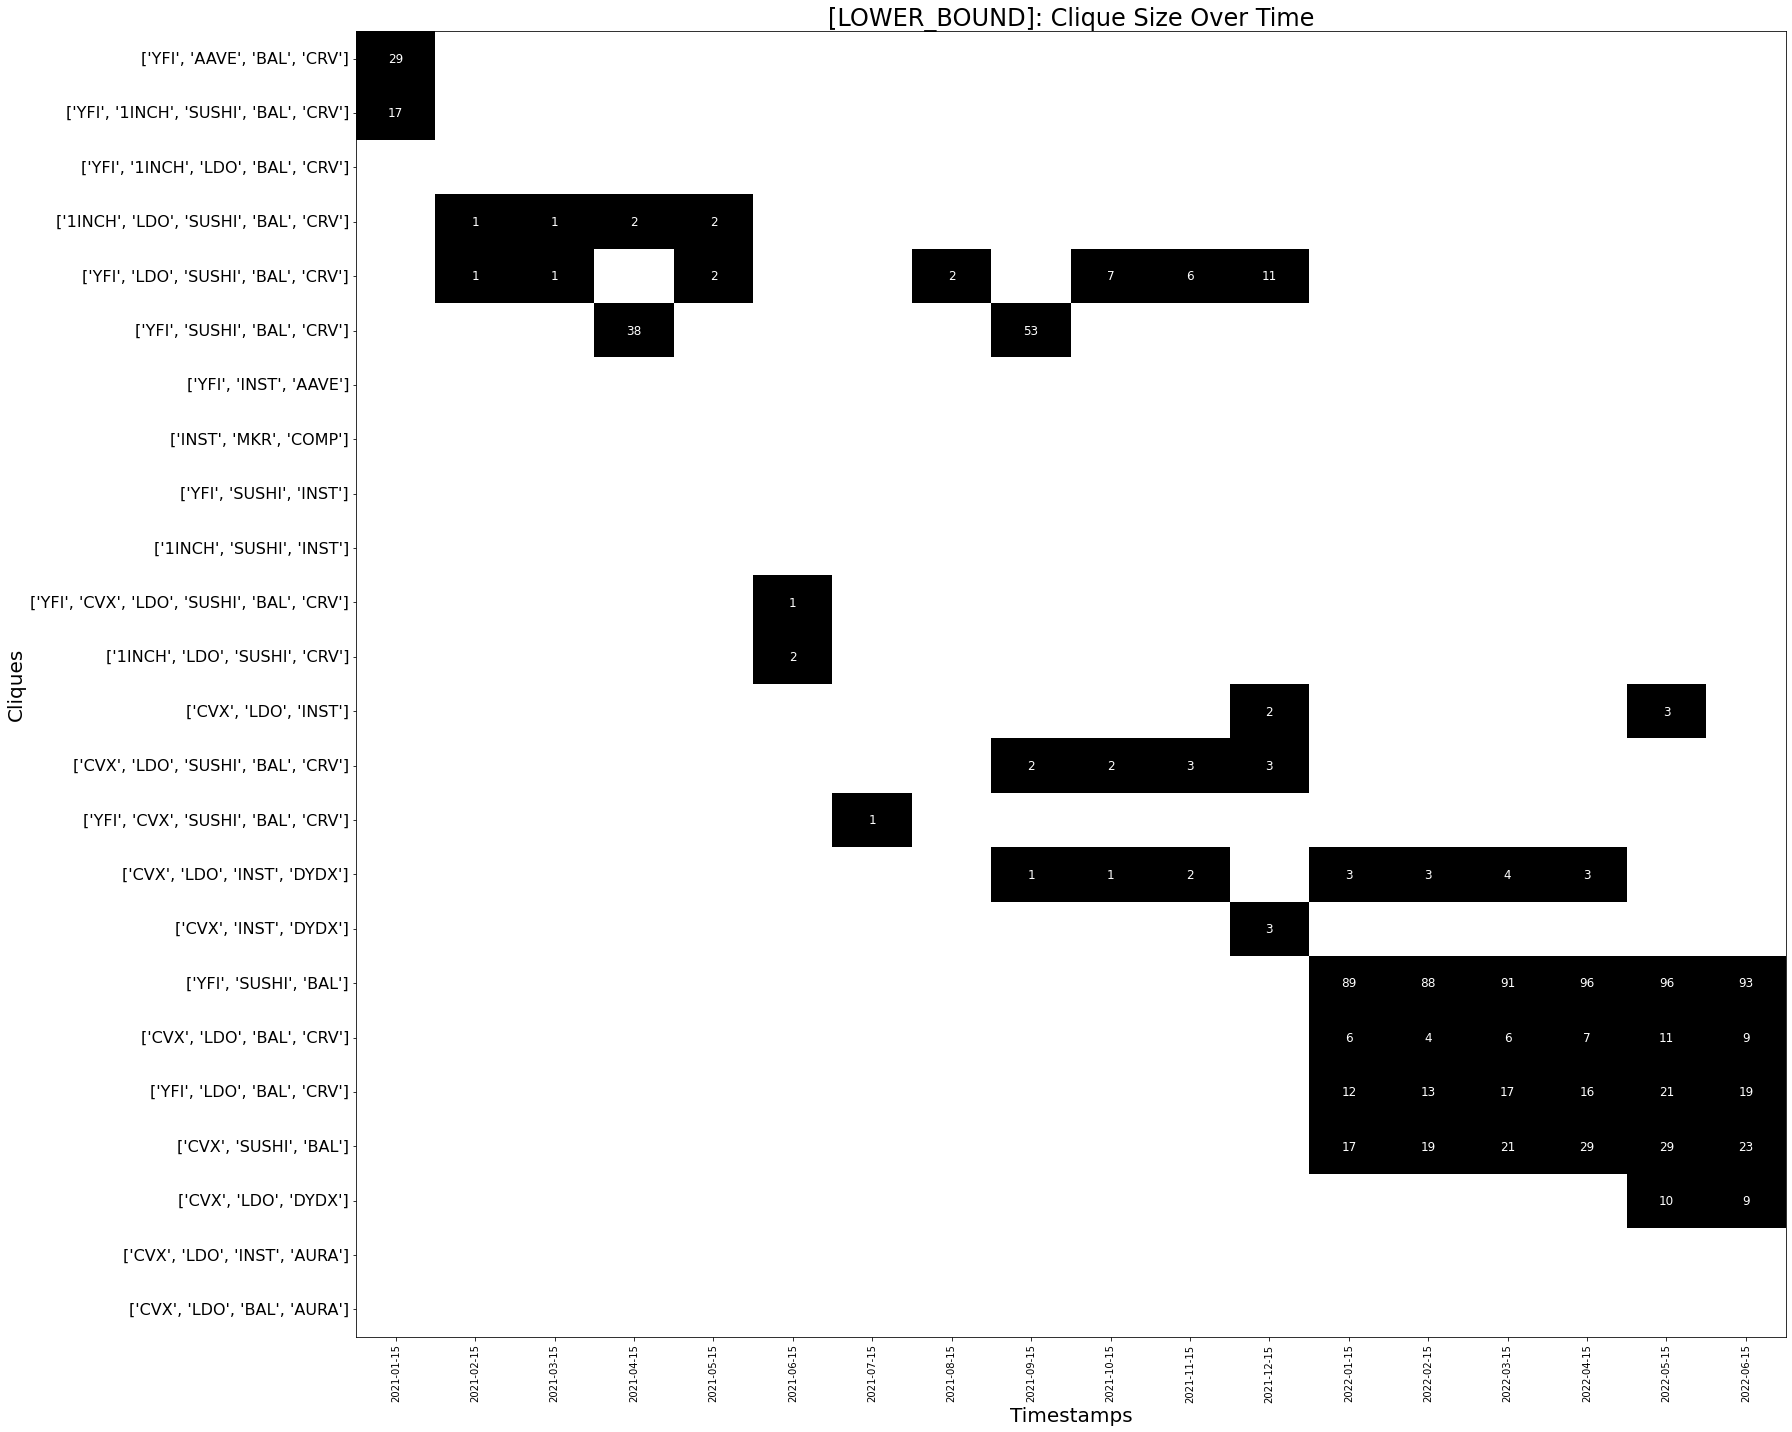

In [5]:
## show lower bound
plot_clique_size_over_time(metric_dataframes, method='lower_bound', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: clique growth over time 

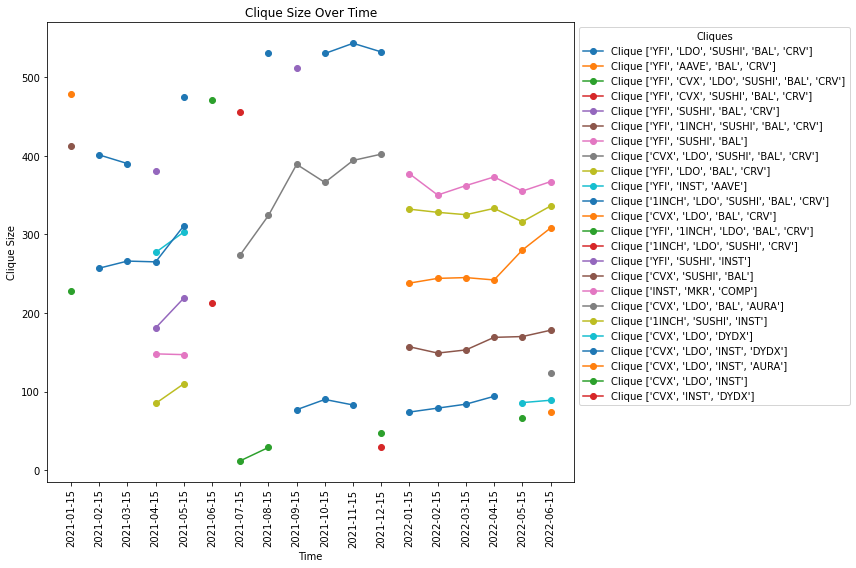

In [6]:
plot_clique_growth_over_time(metric_dataframes, method='upper_bound', group='sample', output_path="output/cliques/", save=False, show=True)


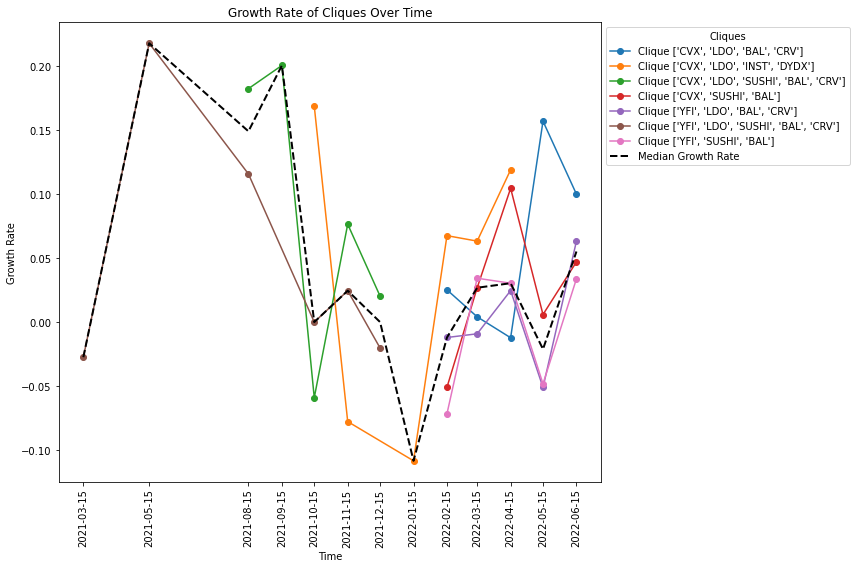

In [7]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_clique_growth_rate_over_time(metric_dataframes, method='upper_bound', group='sample', output_path="output/cliques/", save=False, show=True)


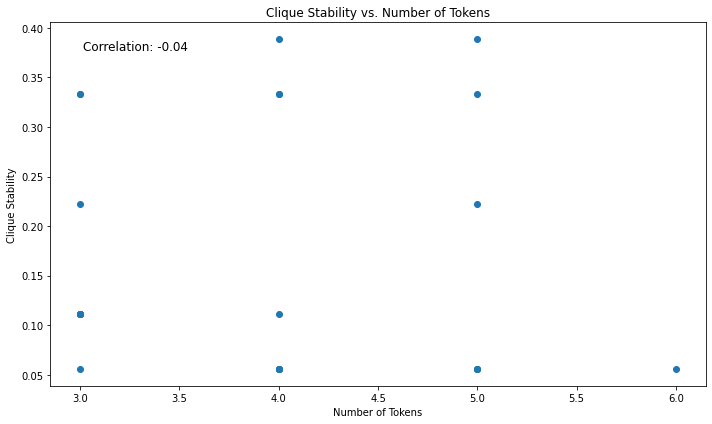

In [8]:
plot_clique_stability_vs_no_of_tokens(metric_dataframes, method='upper_bound', output_path="output/cliques/", save=False, show=True)

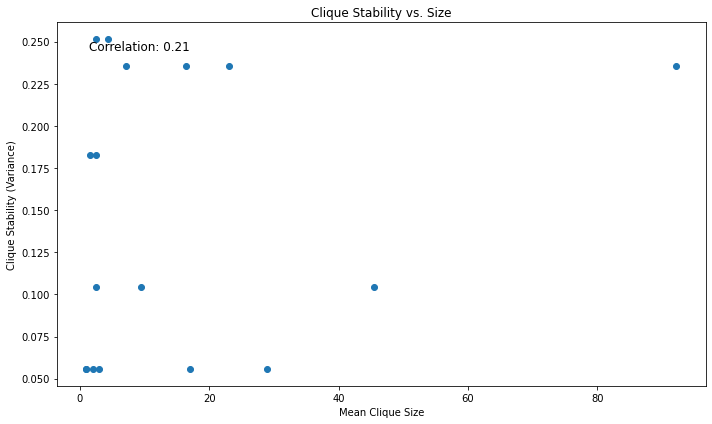

In [9]:
plot_clique_stability_vs_size(metric_dataframes, method='lower_bound', output_path="output/cliques/", save=False, show=True)

### Fig: total_influence

/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


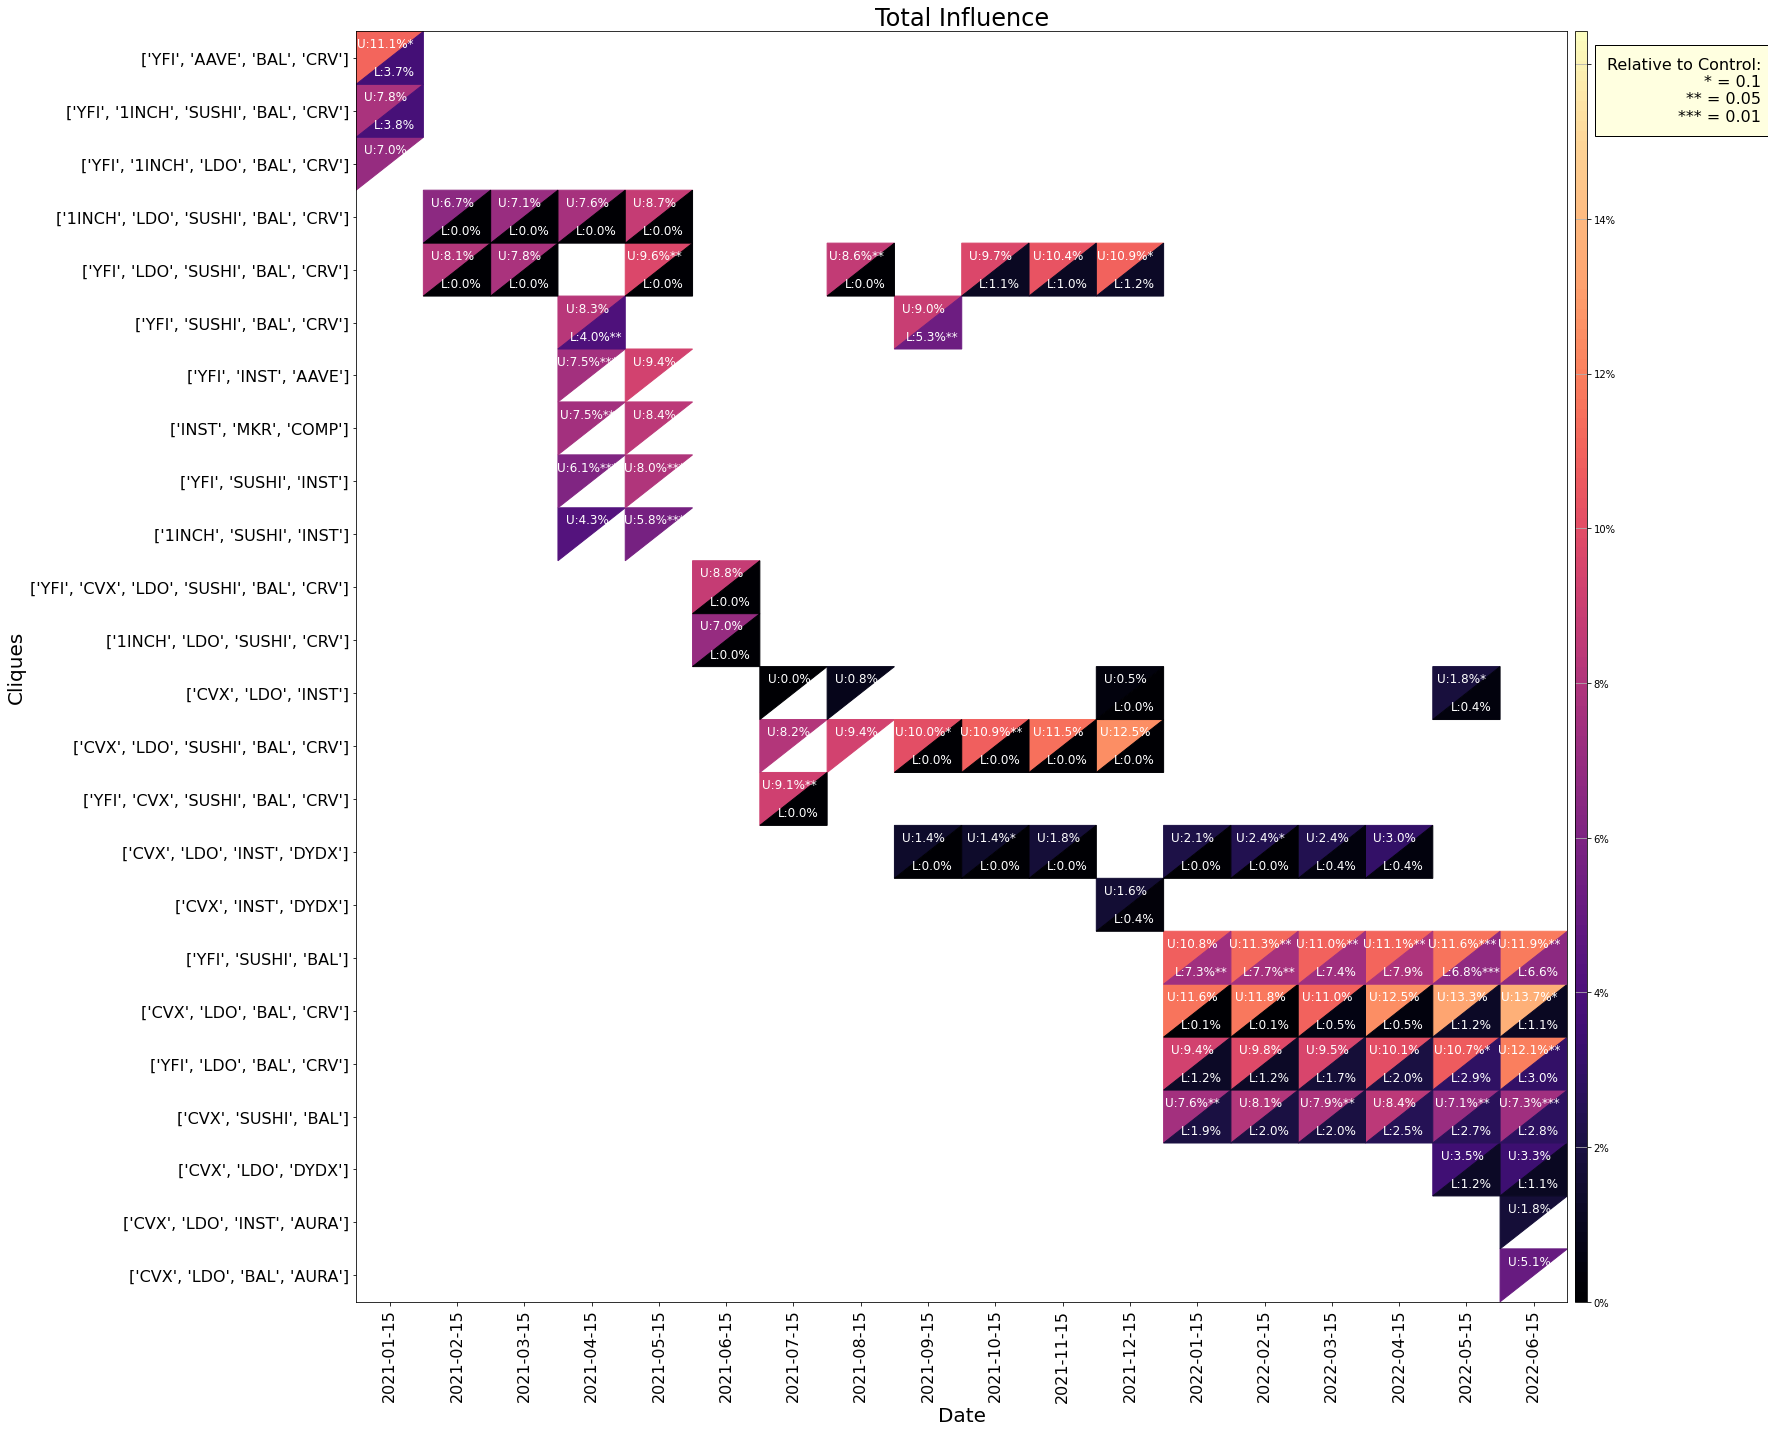

In [10]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True, log=False, save=True, show=True)

In [11]:


# ['size_clique', 'total_influence', 'gini_total_influence', 'internal_influence', 'gini_internal_influence', 'external_influence', 'gini_external_influence', 'wealth_clique', 'gini_wealth_clique', 'median_wealth_level_clique', 'median_no_assets_clique', 'max_influence_label', 'max_influence_label_distribution']


### Fig: gini_total_influence

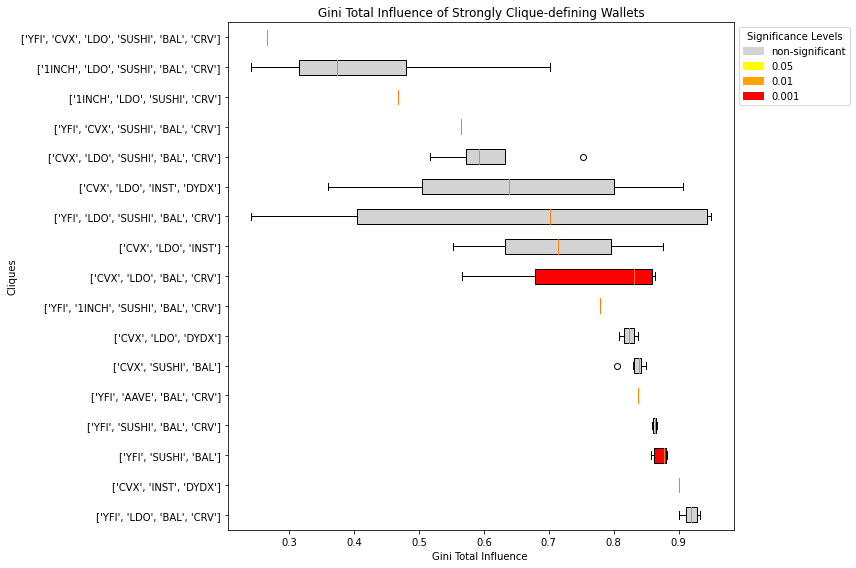

In [12]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='lower_bound', group='sample', output_path="output/cliques/", save=True, show=True)

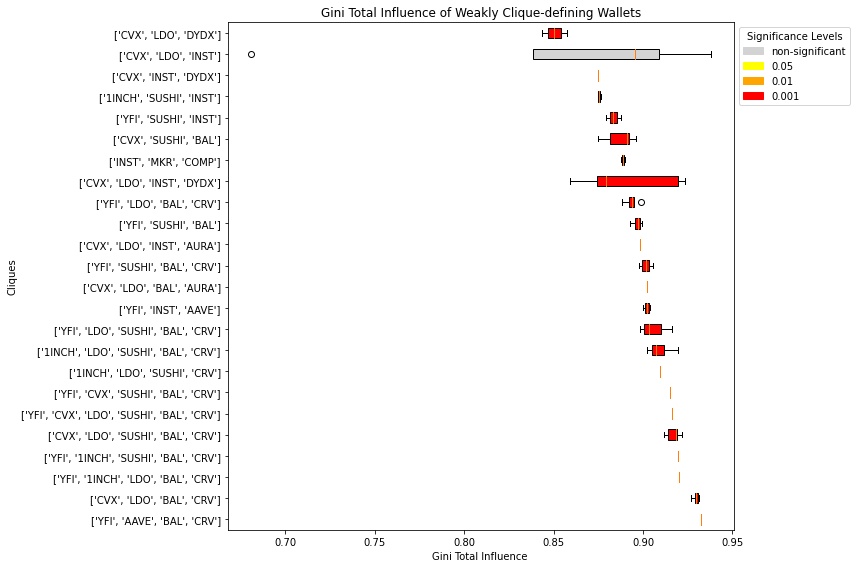

In [13]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True)

### Fig: internal_influence 

/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


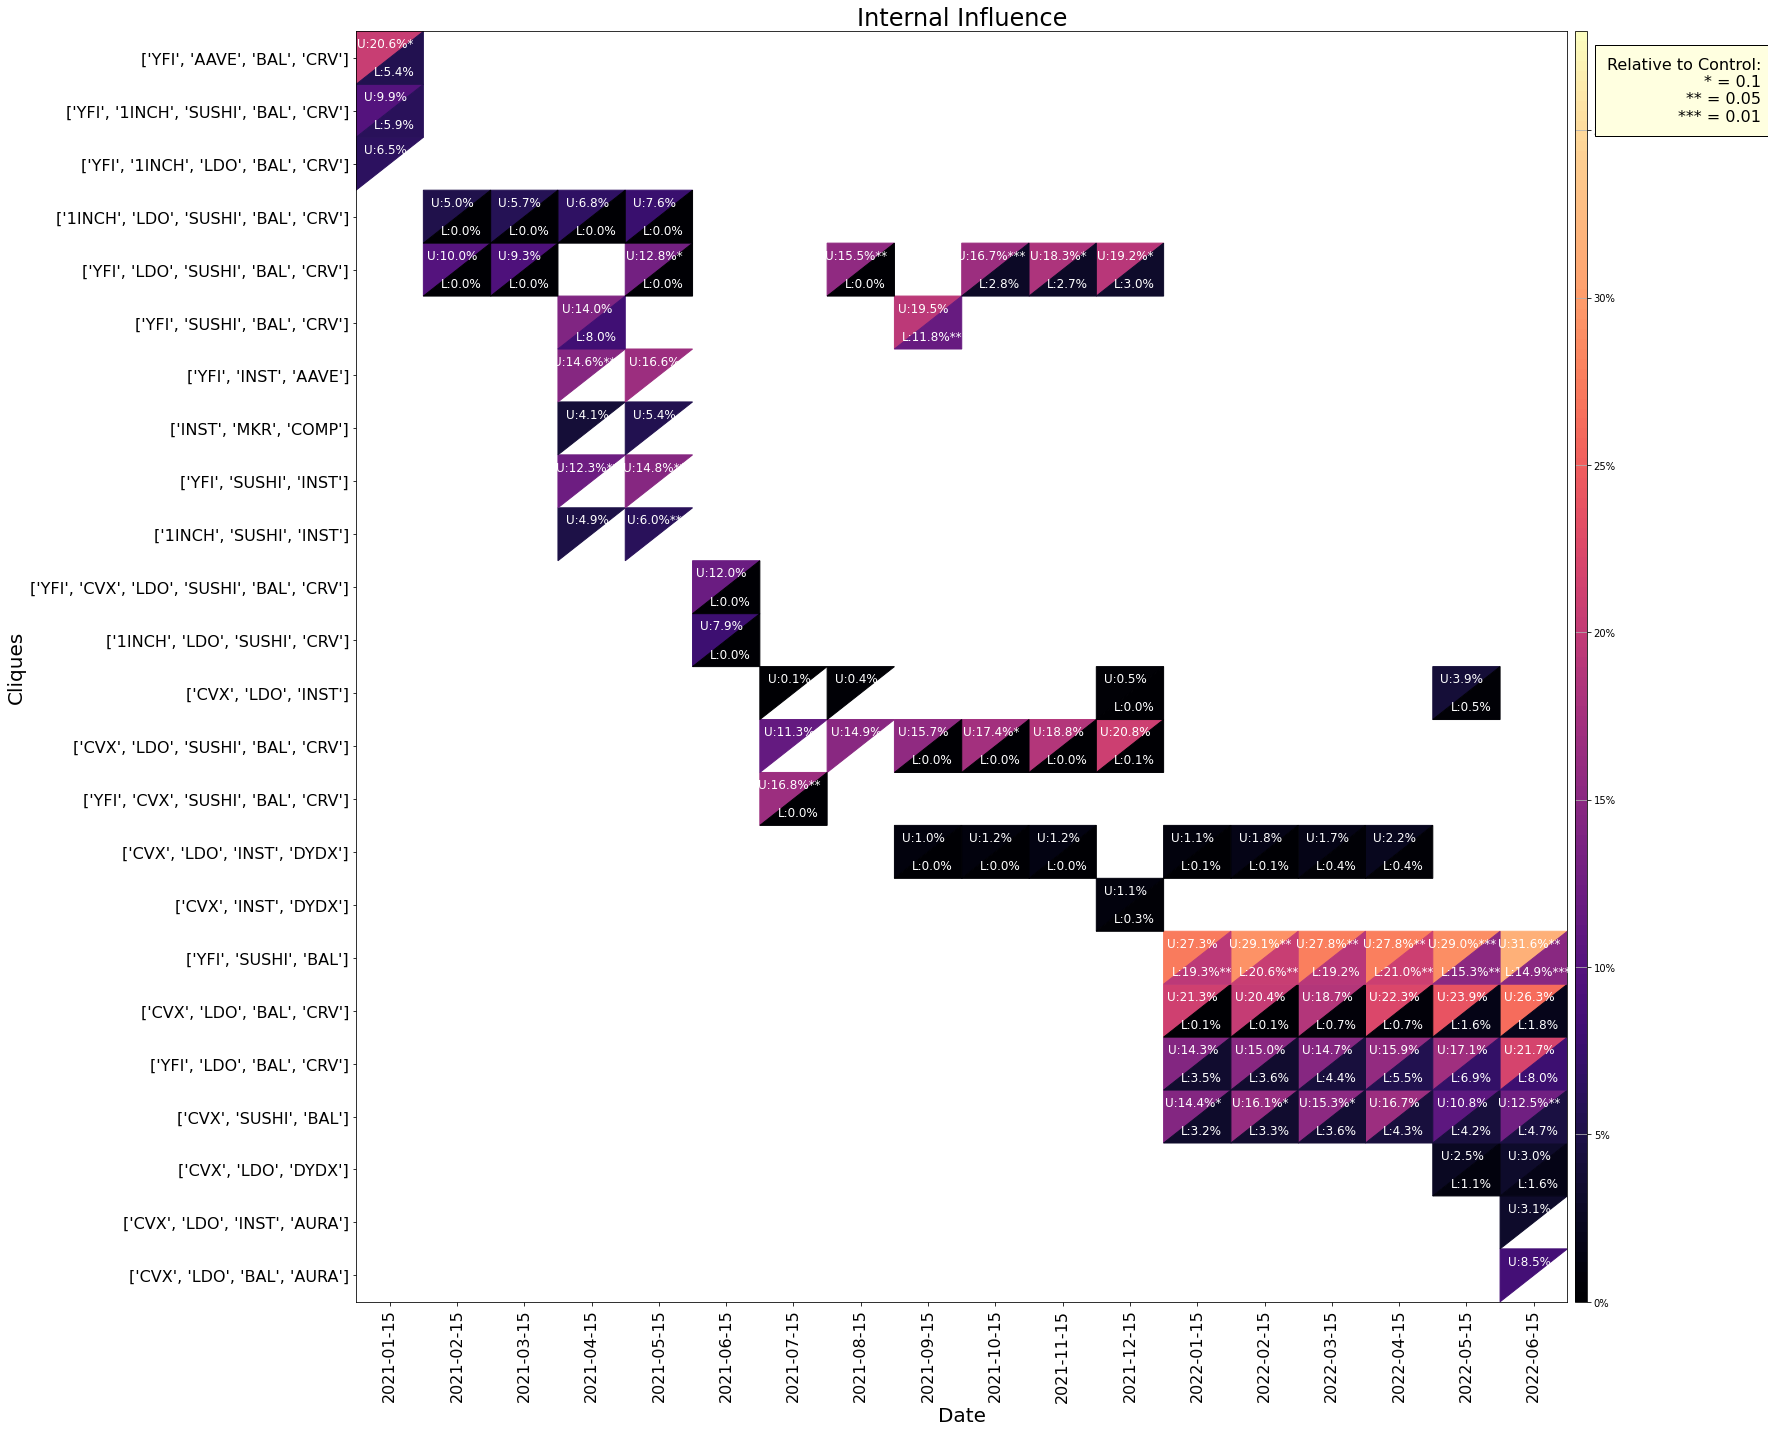

In [14]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True, log=False, save=True, show=True)

### Fig: gini_internal_influence

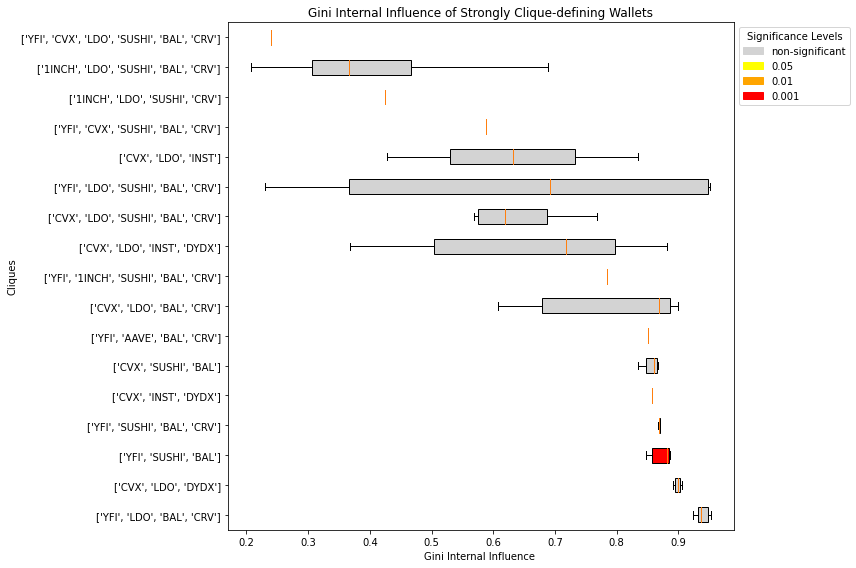

In [15]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='lower_bound', group='sample', output_path="output/cliques/", save=True, show=True)

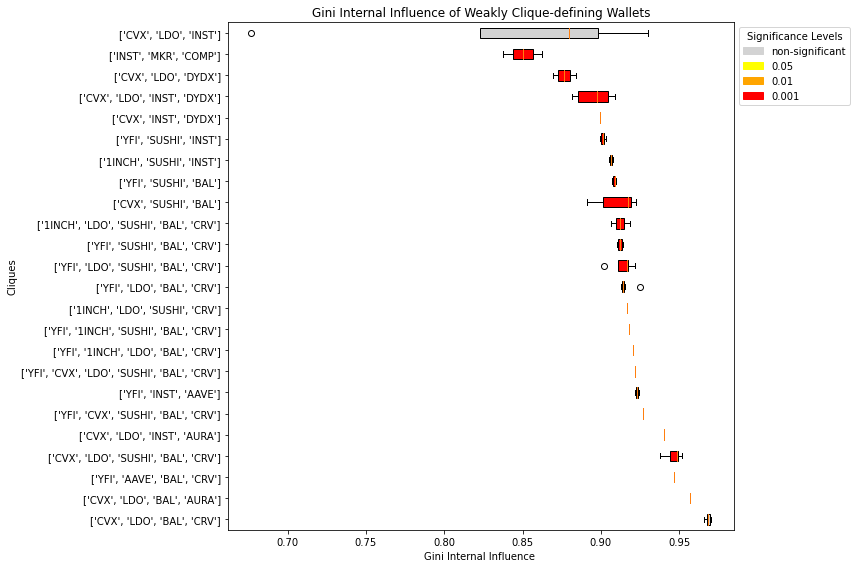

In [16]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True)

### Fig: external_influence

/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


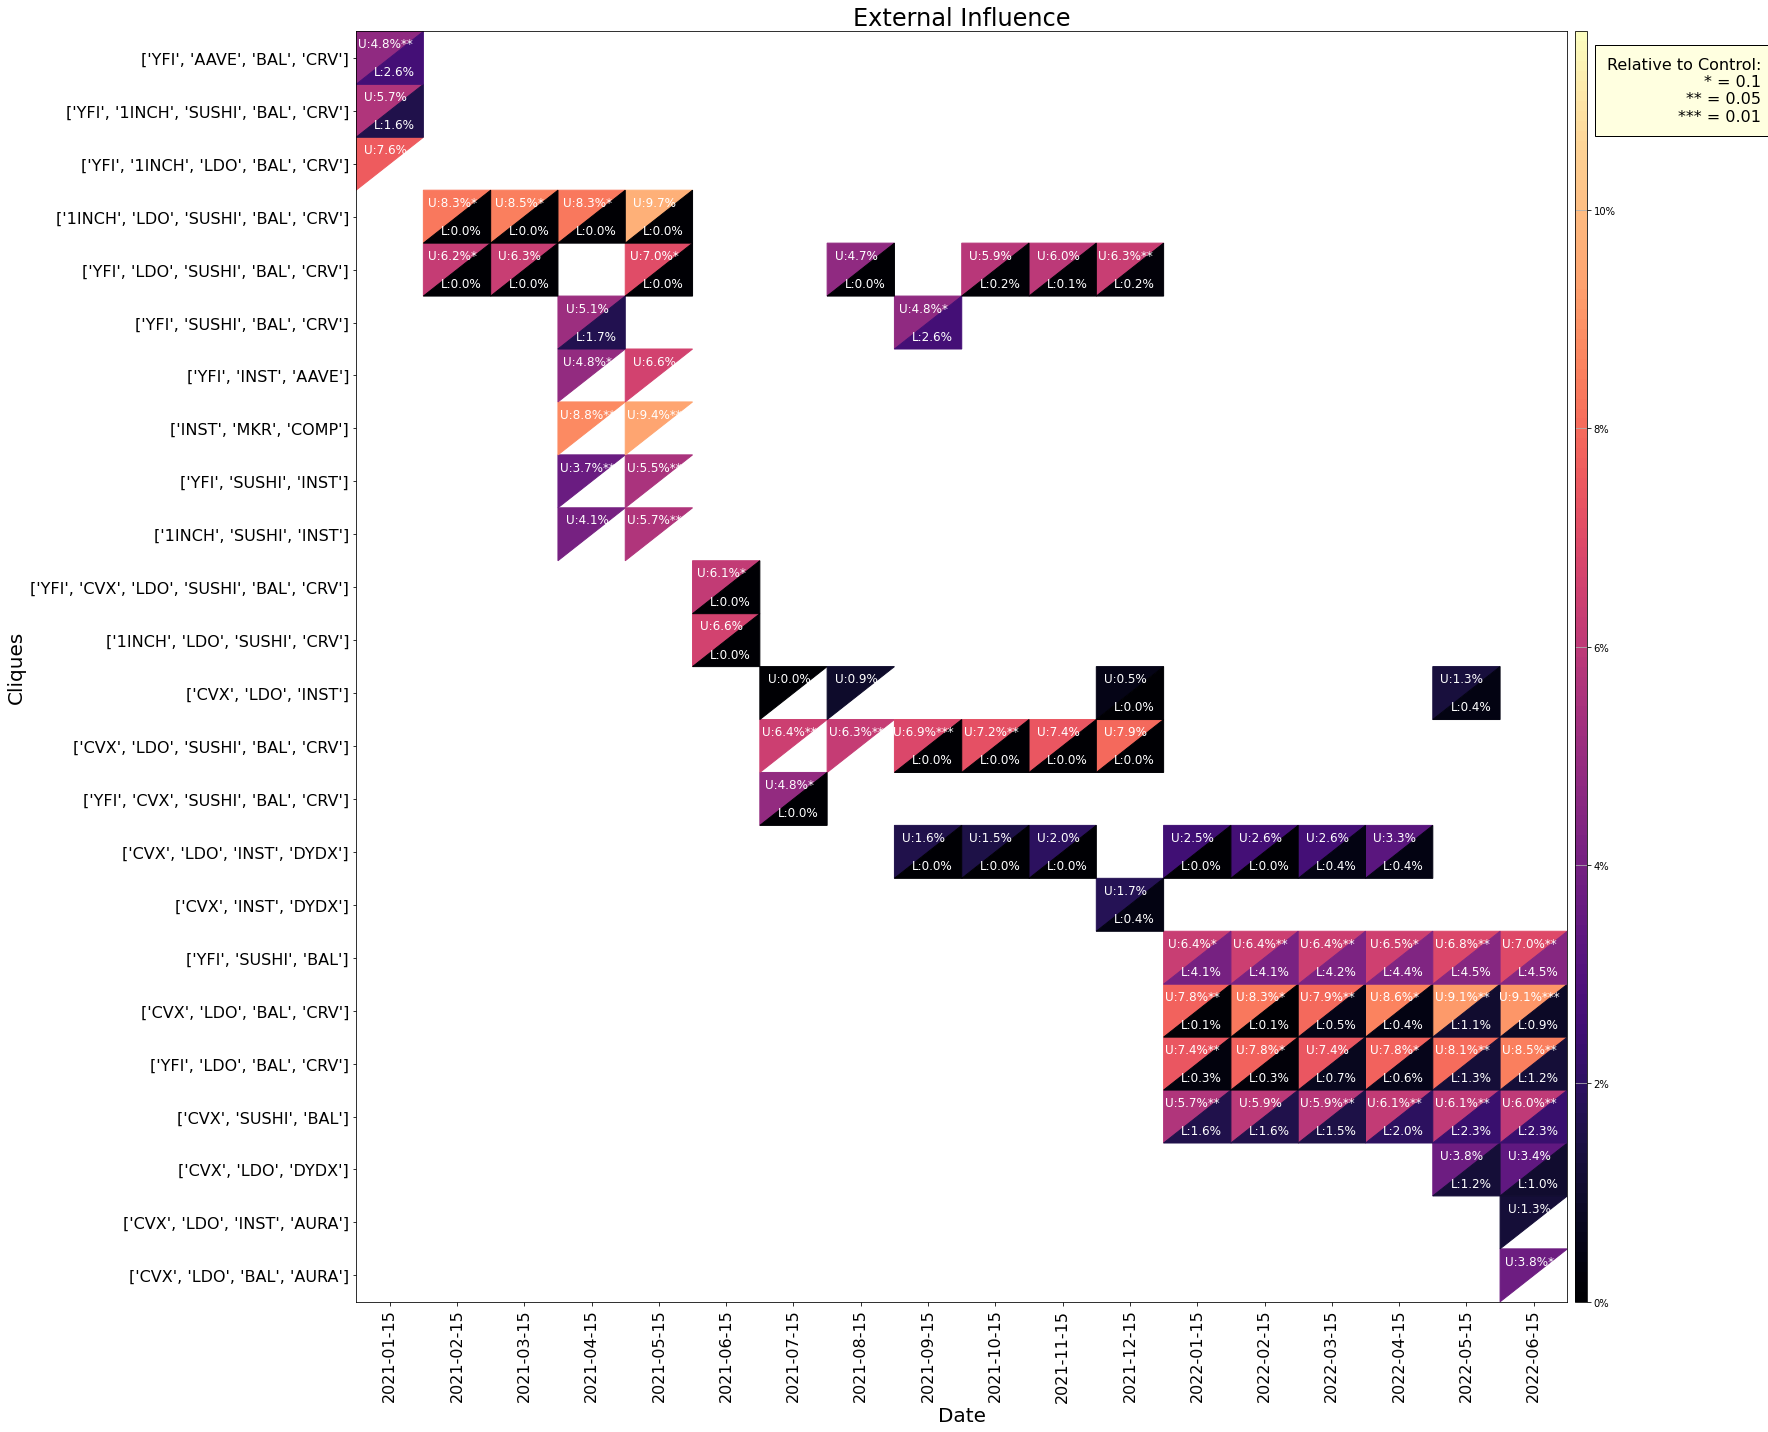

In [17]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, save=True, show=True)

### Fig: gini_external_influence

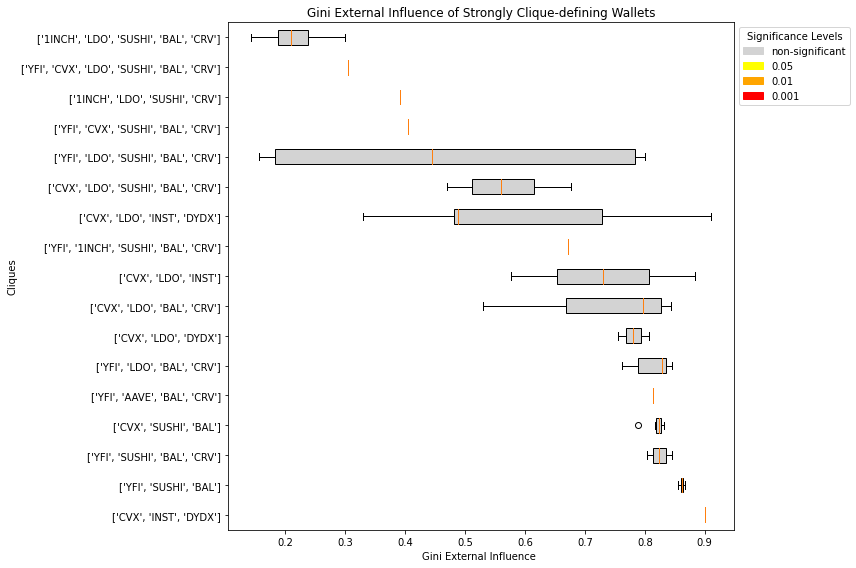

In [18]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='lower_bound', group='sample', output_path="output/cliques/", save=True, show=True)

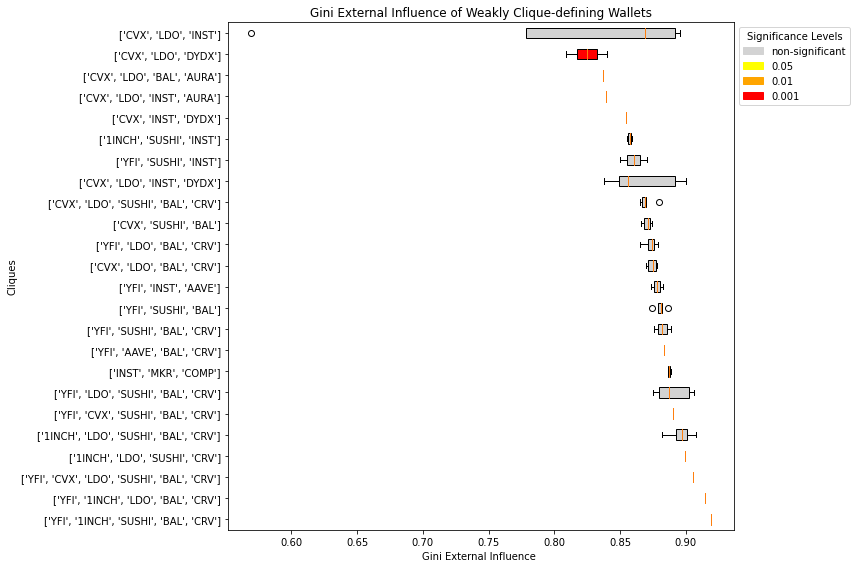

In [19]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True)

### Fig: wealth_clique

/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


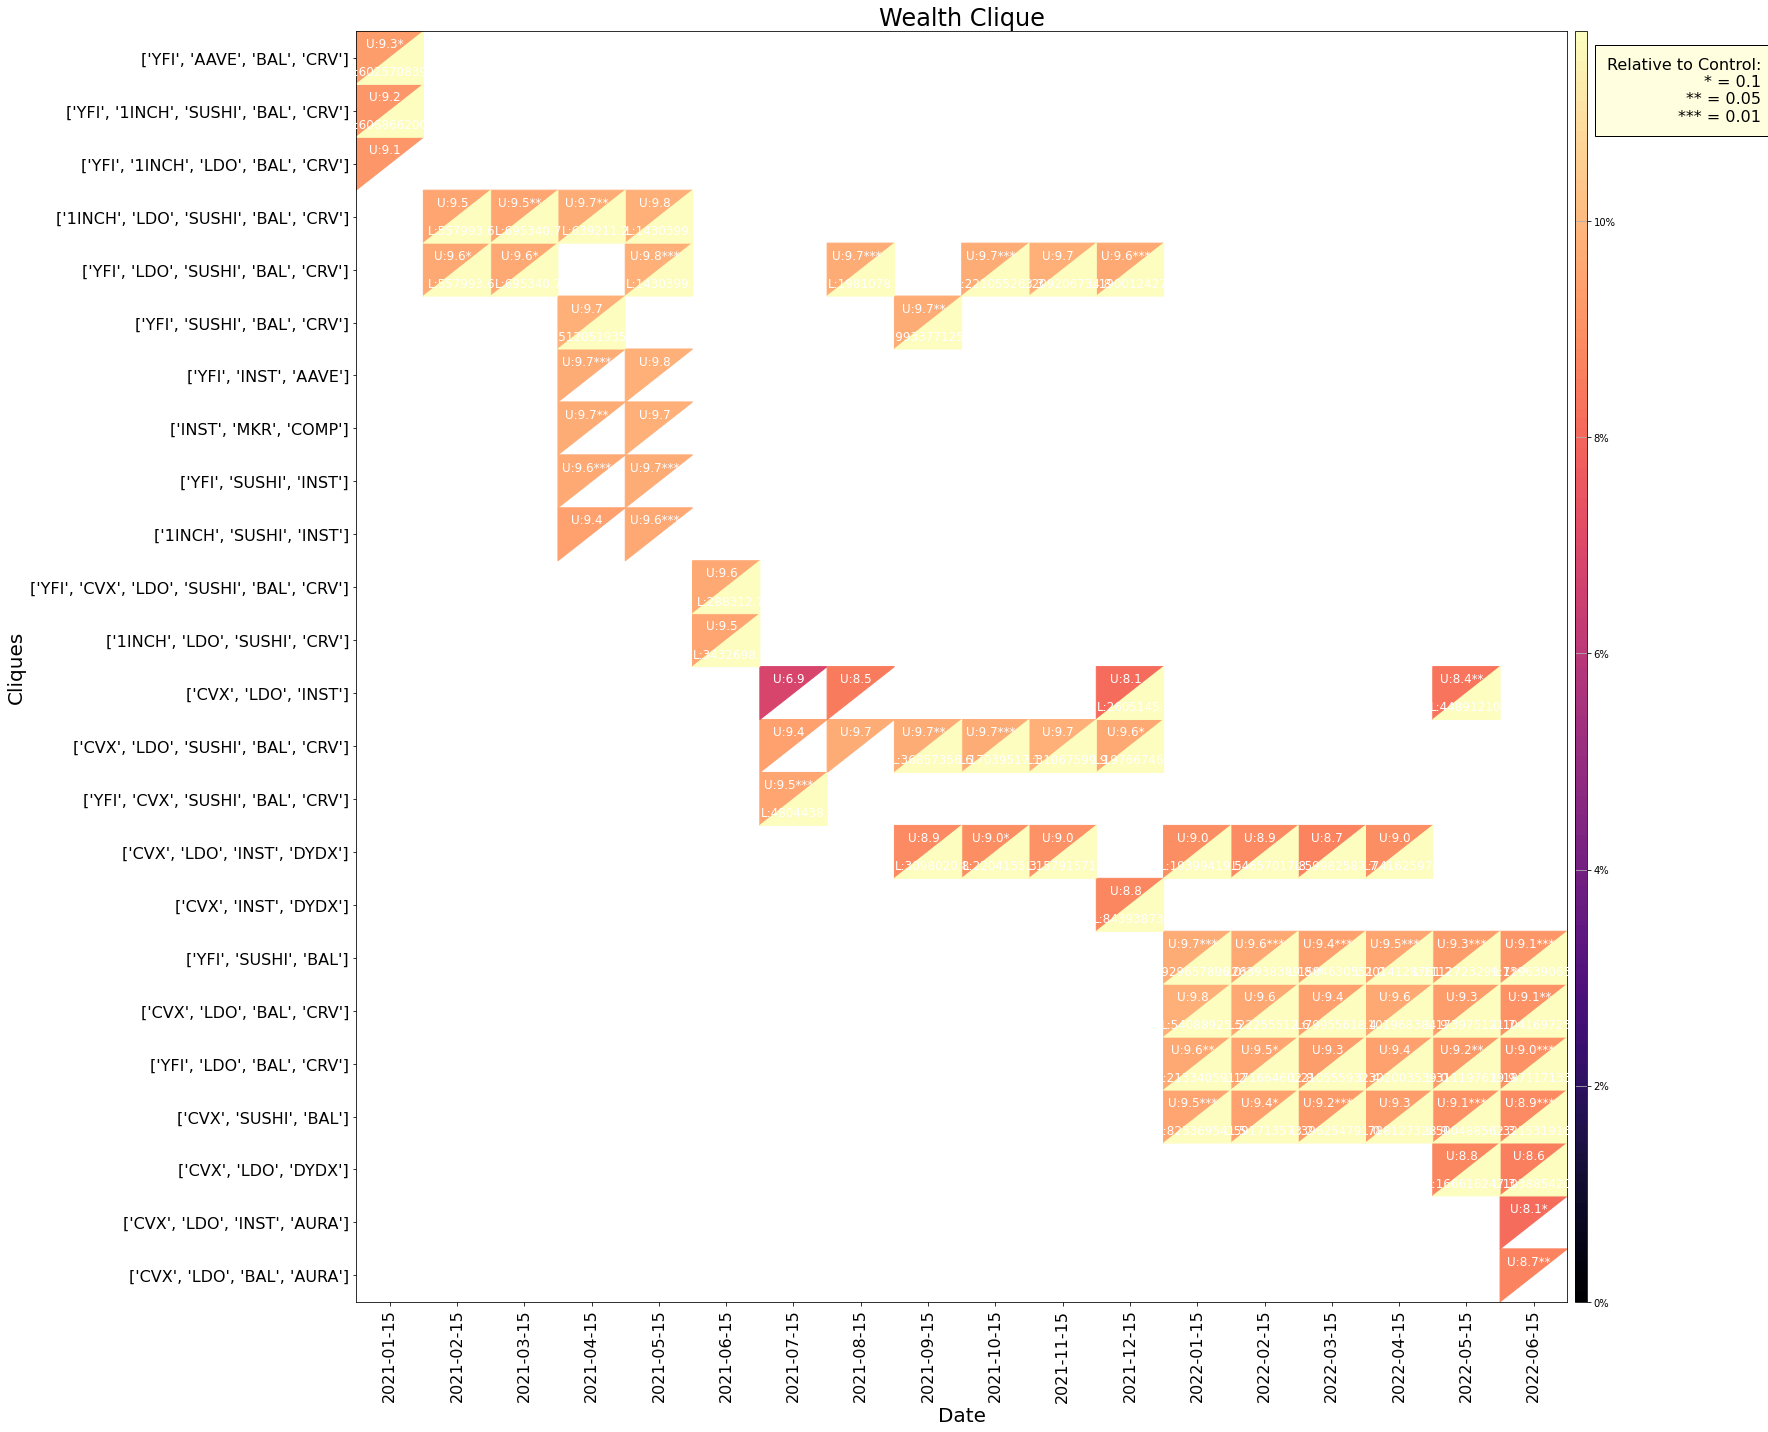

In [20]:
plot_heatmap_chart(metric_dataframes, metric_name='wealth_clique', pct=False,log=True, save=True, show=True) 

### Fig: gini_wealth_clique

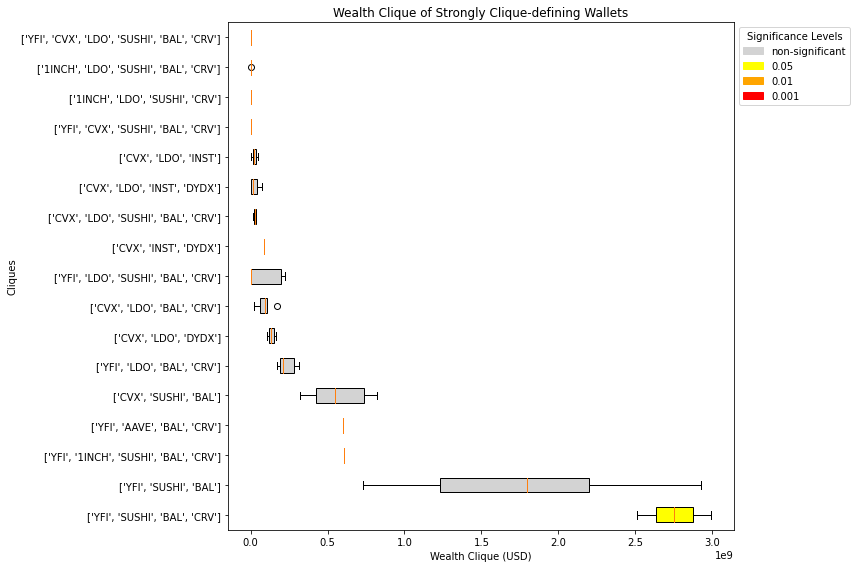

In [21]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='lower_bound', group='sample', output_path="output/cliques/", save=True, show=True)

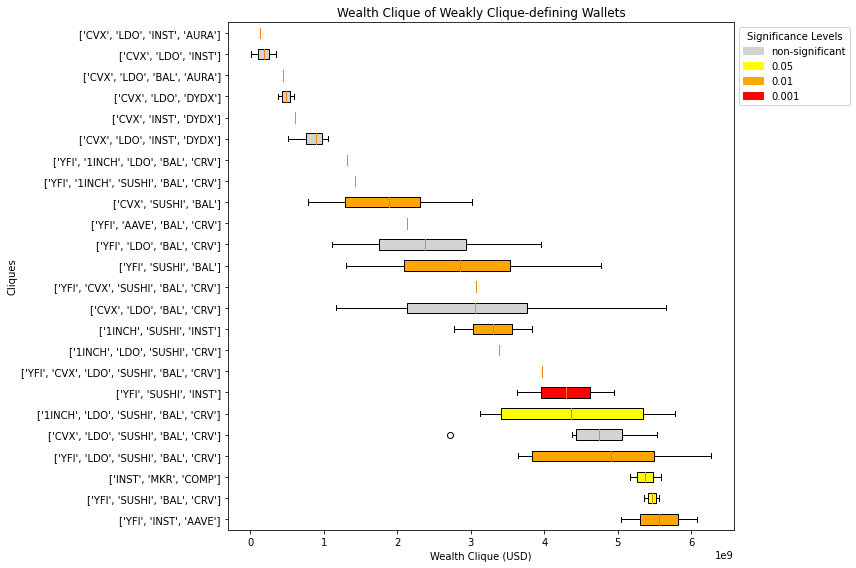

In [22]:
plot_boxplot_with_significance(metric_dataframes, 'wealth_clique', unit='(USD)', method='upper_bound', group='sample', output_path="output/cliques/", save=True, show=True)

### Fig: median_wealth_level_clique || Note: This is the median position size in a clique

/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


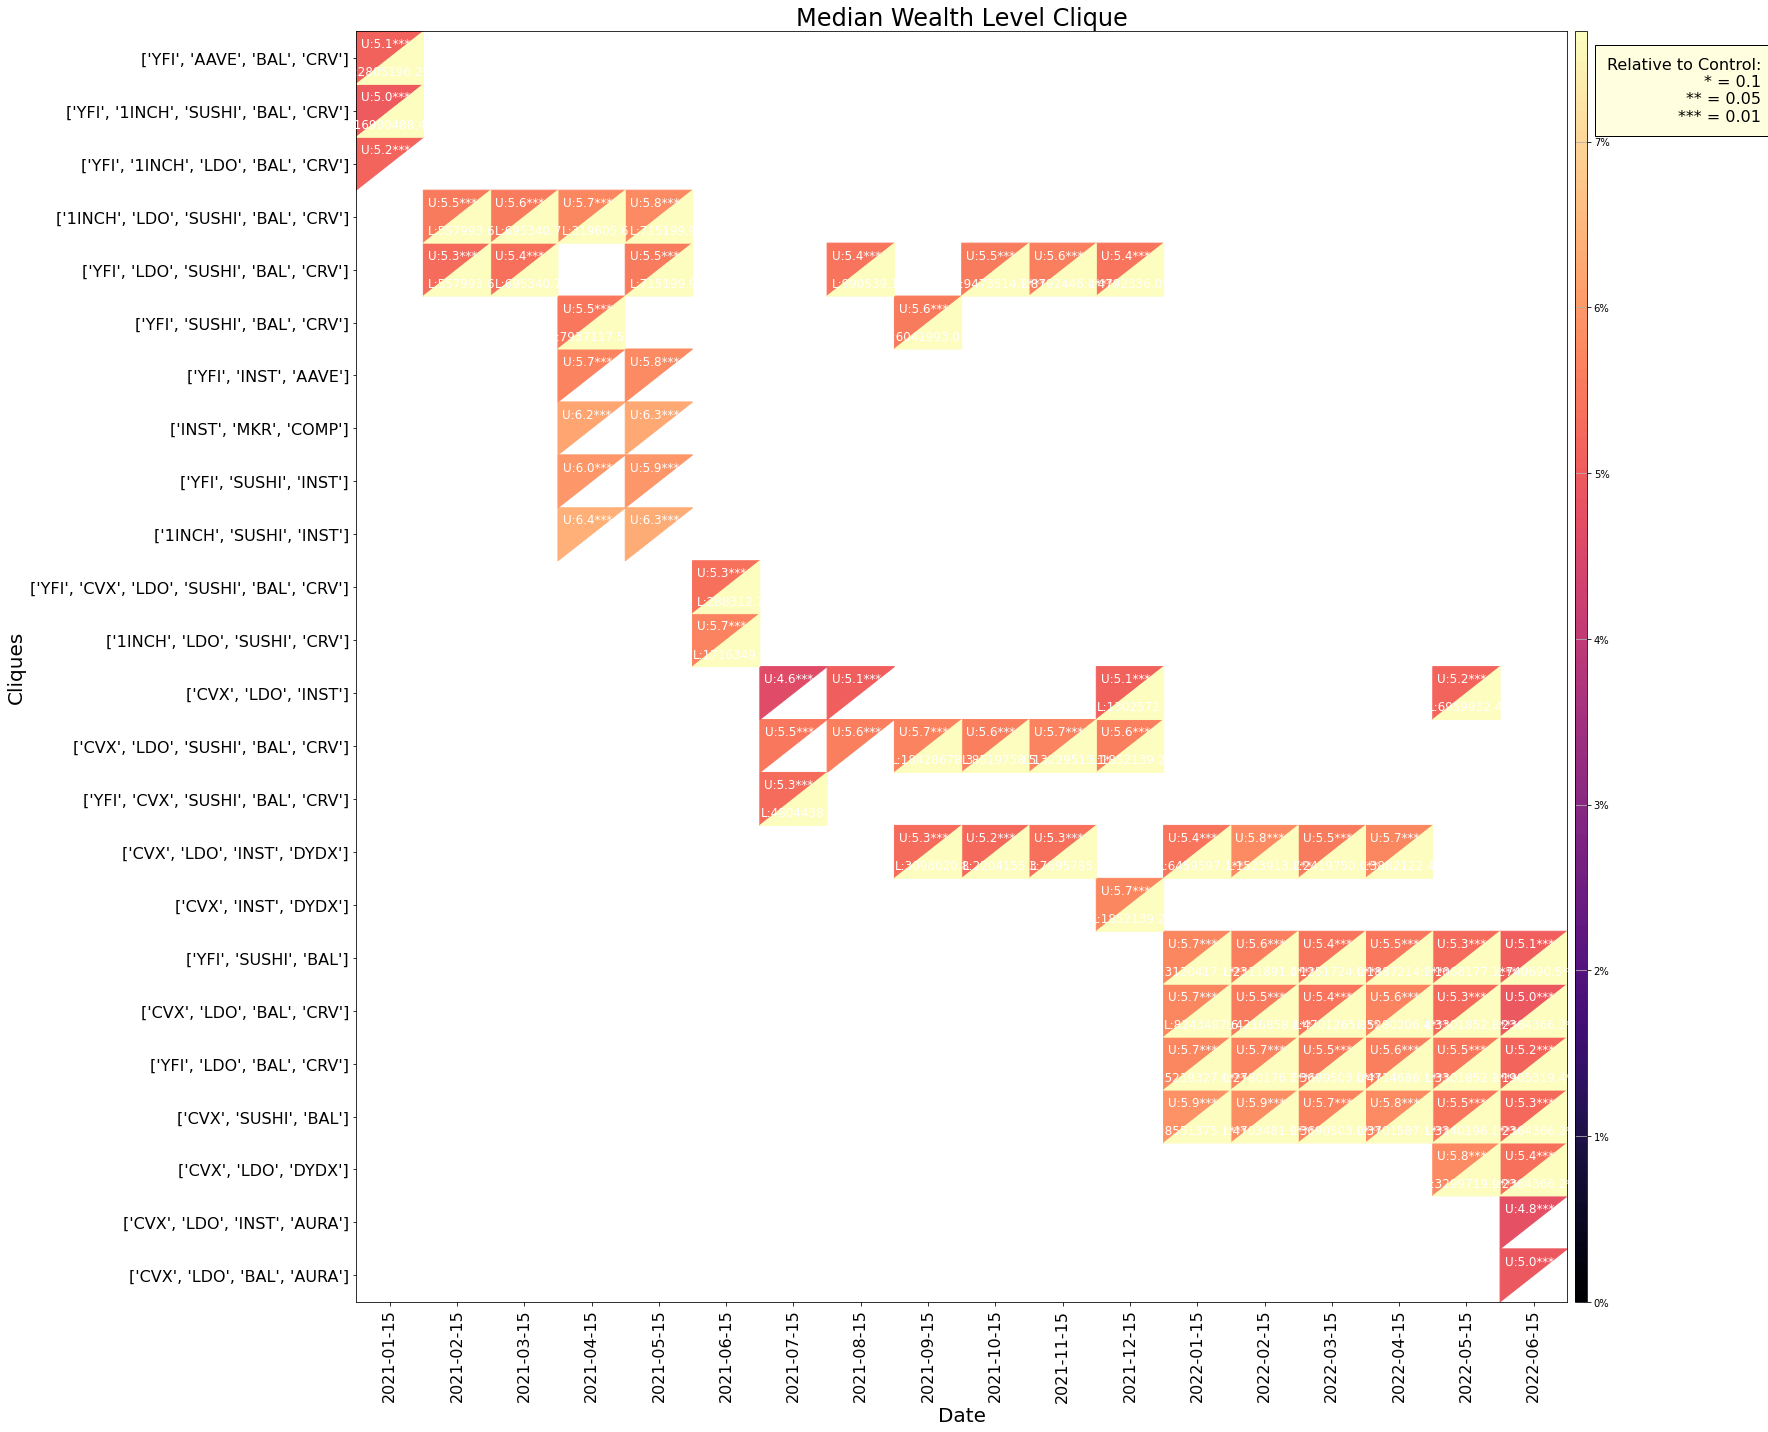

In [23]:
plot_heatmap_chart(metric_dataframes, metric_name='median_wealth_level_clique', pct=False, log=True, save=True, show=True)

### Fig: median_no_assets_clique


/home/user/eisermann/workspace/project-erc20-governance-tokens/src/visualisations/clique_analysis_visualisations.py:383: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


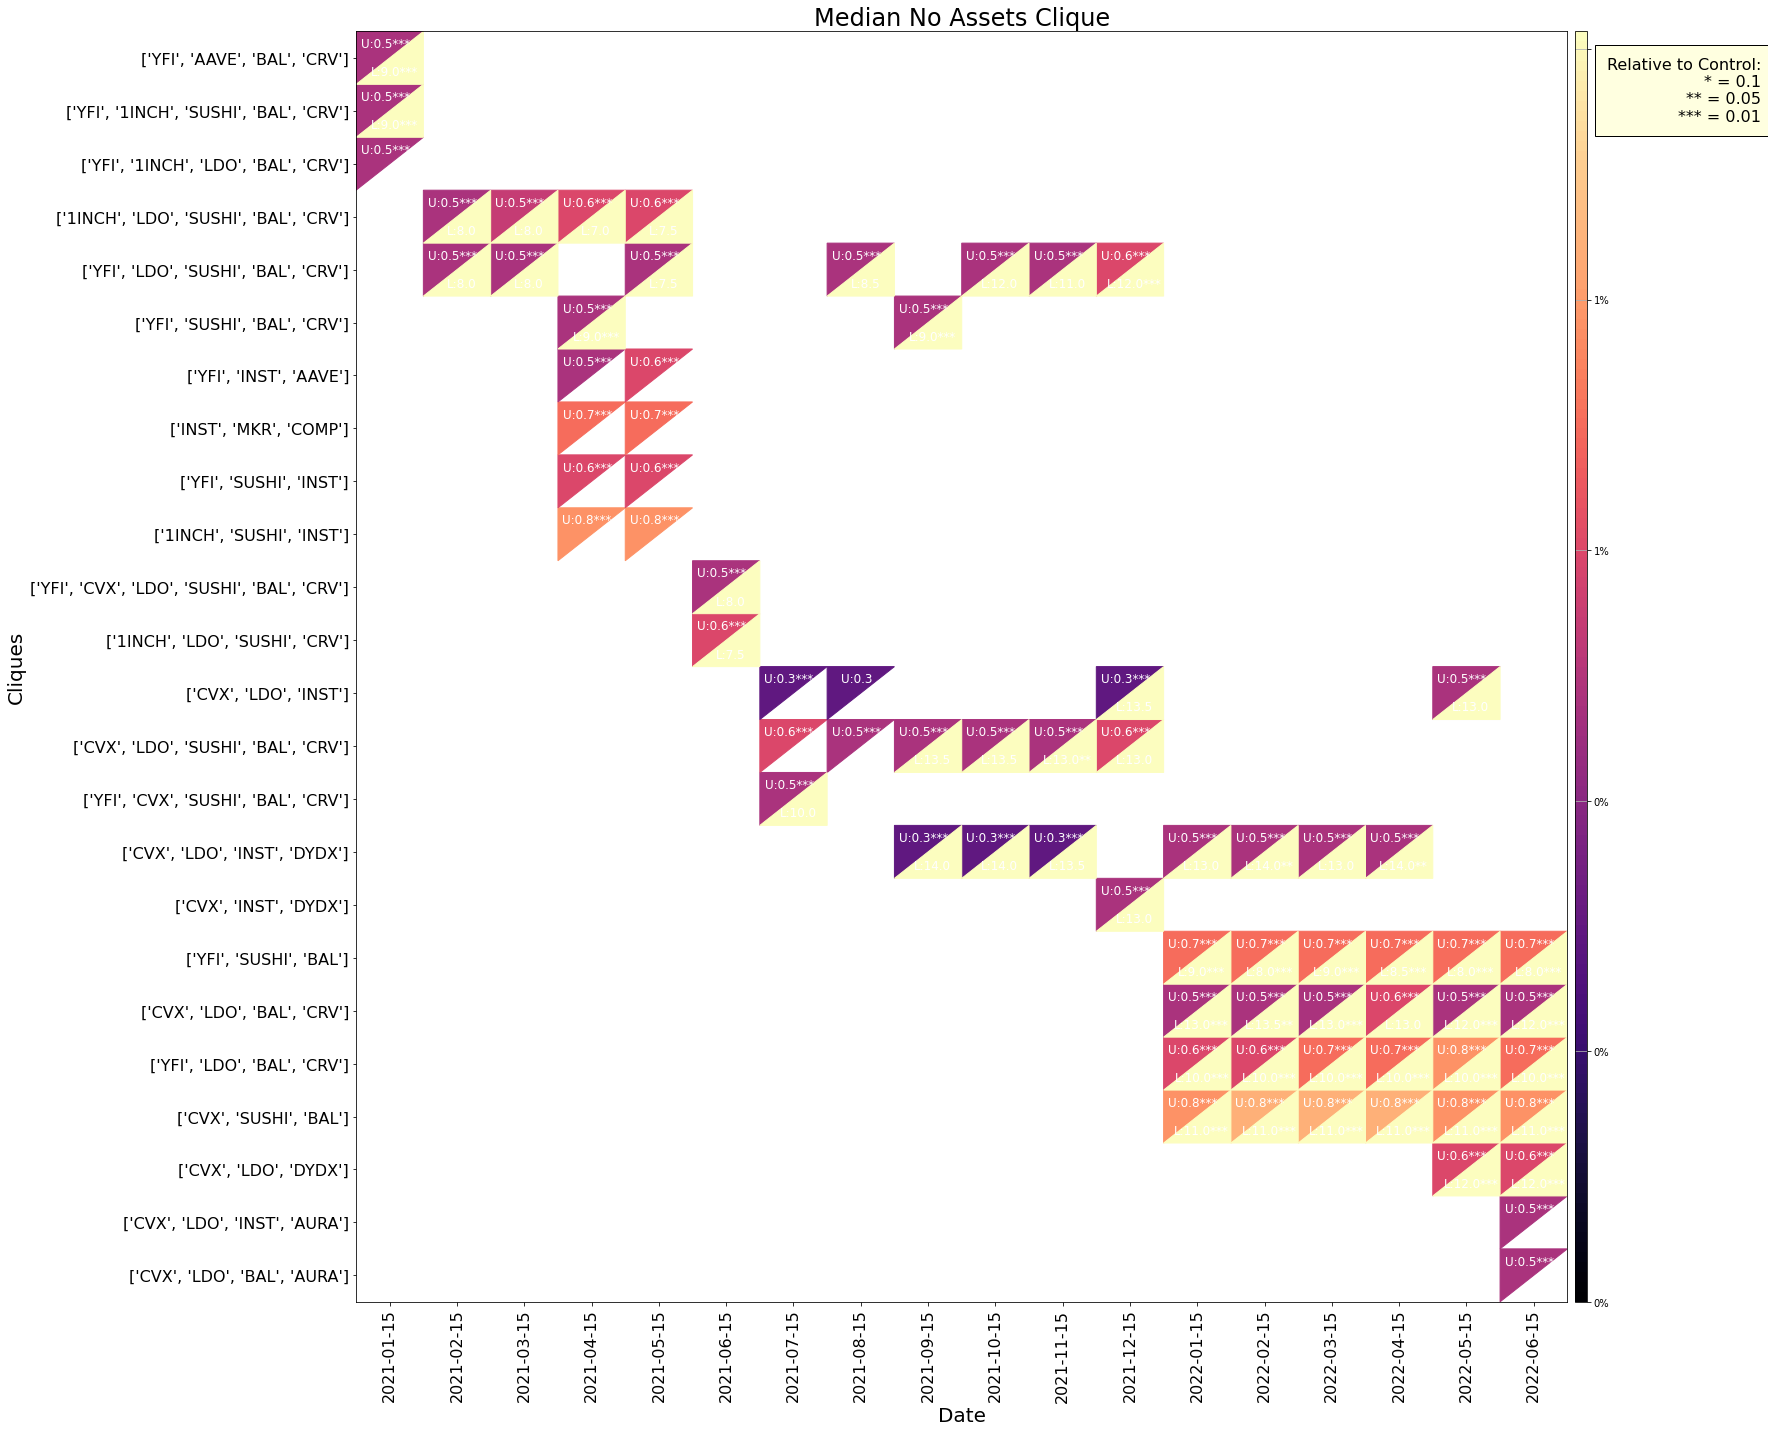

In [24]:
plot_heatmap_chart(metric_dataframes, metric_name='median_no_assets_clique', pct=False, save=True, show=True)

### Fig: Distribution of Labels

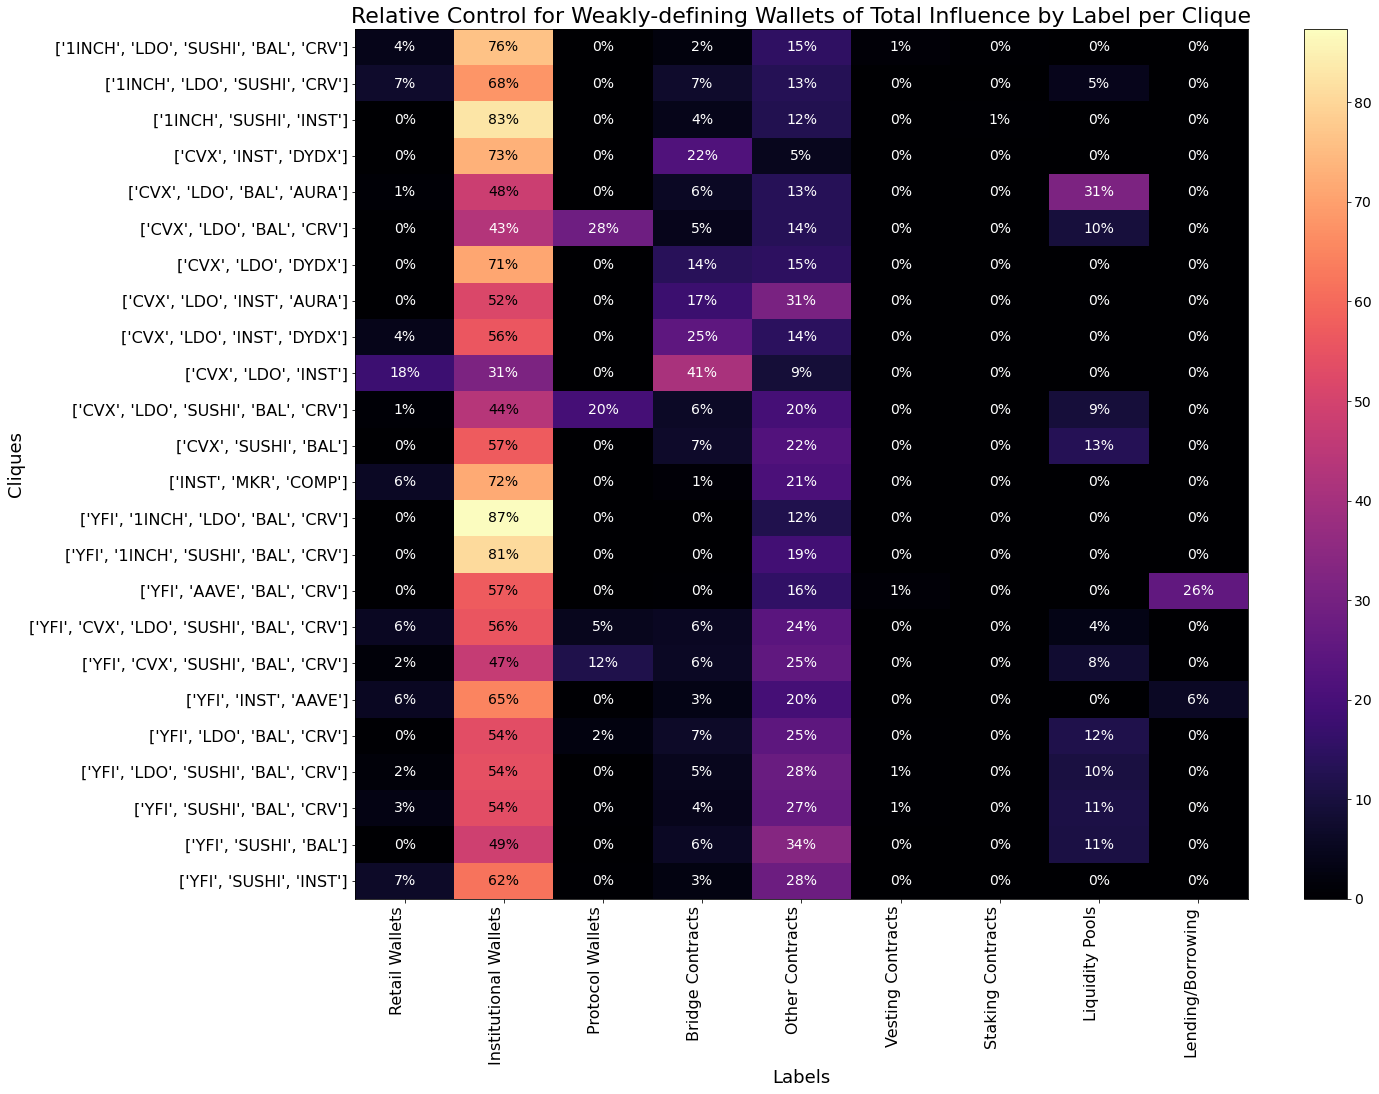

In [25]:
plot_heatmap_labels(metric_dataframes, method='upper_bound', group='sample', colormap='magma', output_path='output/cliques')